In [16]:
import fastbook
fastbook.setup_book()

In [17]:
from fastbook import *
from fastai.vision.widgets import *

In [18]:
audio_types = 'noise','enf'
path = Path("/home/adilet/enfdnn/20240427_noise/data")

In [19]:
fns = get_image_files(path)
fns

(#35712) [Path('/home/adilet/enfdnn/20240427_noise/data/enf/newampvol0_0_recording_61001.png'),Path('/home/adilet/enfdnn/20240427_noise/data/enf/audio_parallel_1_recording_4735.png'),Path('/home/adilet/enfdnn/20240427_noise/data/enf/audio_parallel_0_recording_42232.png'),Path('/home/adilet/enfdnn/20240427_noise/data/enf/amp1hrec_0_recording_42374.png'),Path('/home/adilet/enfdnn/20240427_noise/data/enf/newampvol10_1_recording_11308.png'),Path('/home/adilet/enfdnn/20240427_noise/data/enf/newampvol0_0_recording_48454.png'),Path('/home/adilet/enfdnn/20240427_noise/data/enf/amp1hrec_0_recording_57246.png'),Path('/home/adilet/enfdnn/20240427_noise/data/enf/audio_parallel_1_recording_33535.png'),Path('/home/adilet/enfdnn/20240427_noise/data/enf/vol5new_0_recording_4831.png'),Path('/home/adilet/enfdnn/20240427_noise/data/enf/vol5new_1_recording_9364.png')...]

In [20]:
# failed data extraction verification not needed
# failed = verify_images(fns)
#failed

In [21]:
audioenfData = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [22]:
dls = audioenfData.dataloaders(path)

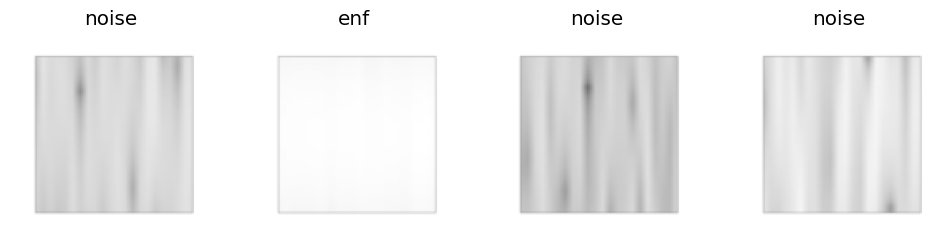

In [23]:
dls.valid.show_batch(max_n=4, nrows=1)

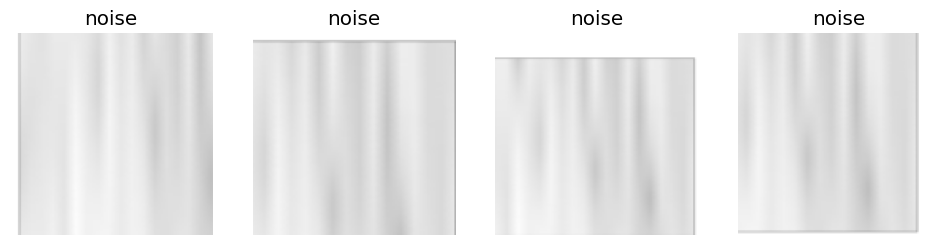

In [24]:
audioenfData = audioenfData.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = audioenfData.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [25]:
audioenfData = audioenfData.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = audioenfData.dataloaders(path)

SuggestedLRs(valley=0.0014454397605732083)

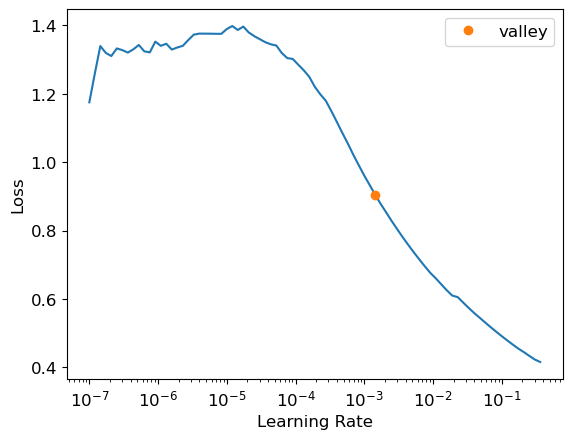

In [27]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.lr_find()

In [28]:
learn.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

In [10]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(15)

epoch,train_loss,valid_loss,error_rate,time
0,0.017367,0.010464,0.002520,14:02


epoch,train_loss,valid_loss,error_rate,time
0,0.004482,0.005420,0.001400,30:47
1,0.004755,0.001162,0.000280,35:39
2,0.004061,0.000055,0.000000,35:39
3,0.003145,0.000821,0.000560,35:45
4,0.003851,0.000004,0.000000,36:06
5,0.000282,0.000008,0.000000,36:10
6,0.002174,0.000318,0.000280,36:13
7,0.002185,0.000235,0.000280,36:37
8,0.000876,0.002891,0.000560,36:28
9,0.000563,0.000013,0.000000,36:51


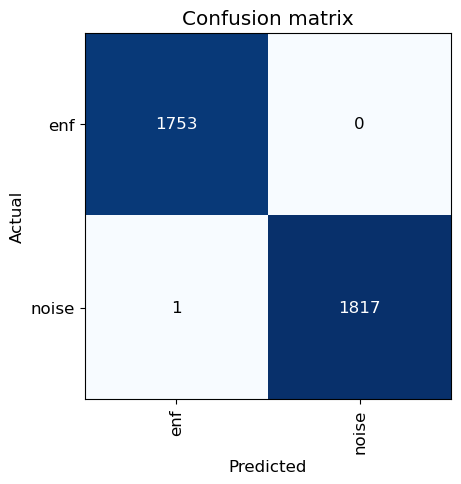

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [12]:
learn.export("20240427_enfvsnoise.pkl")

8928


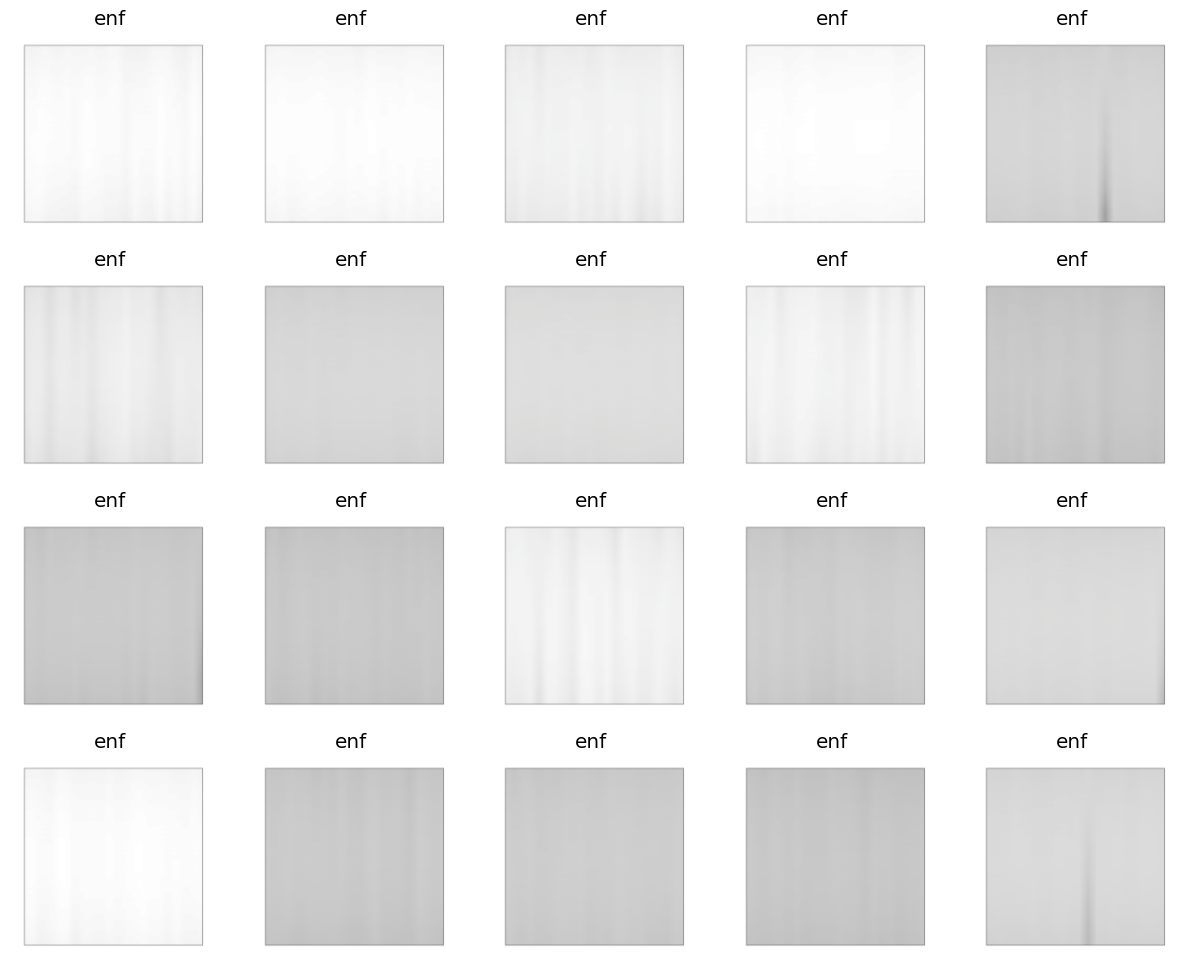

In [13]:
test_path = "./test"
test_data = get_image_files(test_path)
print(len(test_data))
tst_dl = dls.test_dl(test_data, with_labels=True)
tst_dl.show_batch(max_n=20)

In [15]:
preds, y = learn.get_preds(dl=tst_dl)
ac = accuracy(preds,y)
print(ac)

TensorBase(0.9999)


AssertionError: Torch not compiled with CUDA enabled